# CS559 Assignment3 Problem5 Neural Networks
Student Name: Chenxu Wang  
CWID: 10457625  
E-mail: cwang101@stevens.edu  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from scipy.sparse import coo_matrix
from sklearn.utils import shuffle

In [2]:
# shuffle data
def shuffle_iris(X, y, random_state):
    X_sparse = coo_matrix(X)
    X, X_sparse, y = shuffle(X, X_sparse, y, random_state=random_state)
    X = X_sparse.toarray()
    return X, y

In [3]:
# TODO get x(data) and y(label) from iris
iris = load_iris()

In [4]:
X, y = shuffle_iris(iris.data, iris.target, 42)

In [5]:
print(X)

[[6.1 2.8 4.7 1.2]
 [5.7 3.8 1.7 0.3]
 [7.7 2.6 6.9 2.3]
 [6.  2.9 4.5 1.5]
 [6.8 2.8 4.8 1.4]
 [5.4 3.4 1.5 0.4]
 [5.6 2.9 3.6 1.3]
 [6.9 3.1 5.1 2.3]
 [6.2 2.2 4.5 1.5]
 [5.8 2.7 3.9 1.2]
 [6.5 3.2 5.1 2. ]
 [4.8 3.  1.4 0.1]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [5.1 3.8 1.5 0.3]
 [6.3 3.3 4.7 1.6]
 [6.5 3.  5.8 2.2]
 [5.6 2.5 3.9 1.1]
 [5.7 2.8 4.5 1.3]
 [6.4 2.8 5.6 2.2]
 [4.7 3.2 1.6 0.2]
 [6.1 3.  4.9 1.8]
 [5.  3.4 1.6 0.4]
 [6.4 2.8 5.6 2.1]
 [7.9 3.8 6.4 2. ]
 [6.7 3.  5.2 2.3]
 [6.7 2.5 5.8 1.8]
 [6.8 3.2 5.9 2.3]
 [4.8 3.  1.4 0.3]
 [4.8 3.1 1.6 0.2]
 [4.6 3.6 1.  0.2]
 [5.7 4.4 1.5 0.4]
 [6.7 3.1 4.4 1.4]
 [4.8 3.4 1.6 0.2]
 [4.4 3.2 1.3 0.2]
 [6.3 2.5 5.  1.9]
 [6.4 3.2 4.5 1.5]
 [5.2 3.5 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.2 4.1 1.5 0.1]
 [5.8 2.7 5.1 1.9]
 [6.  3.4 4.5 1.6]
 [6.7 3.1 4.7 1.5]
 [5.4 3.9 1.3 0.4]
 [5.4 3.7 1.5 0.2]
 [5.5 2.4 3.7 1. ]
 [6.3 2.8 5.1 1.5]
 [6.4 3.1 5.5 1.8]
 [6.6 3.  4.4 1.4]
 [7.2 3.6 6.1 2.5]
 [5.7 2.9 4.2 1.3]
 [7.6 3.  6.6 2.1]
 [5.6 3.  4.

In [6]:
print(y)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0 0 0 2 1 1 0 0 1 2 2 1 2 1 2 1 0 2 1 0 0 0 1 2 0 0 0 1 0 1 2 0 1 2 0 2 2
 1 1 2 1 0 1 2 0 0 1 1 0 2 0 0 1 1 2 1 2 2 1 0 0 2 2 0 0 0 1 2 0 2 2 0 1 1
 2 1 2 0 2 1 2 1 1 1 0 1 1 0 1 2 2 0 1 2 2 0 2 0 1 2 2 1 2 1 1 2 2 0 1 2 0
 1 2]


In [7]:
X.shape

(150, 4)

In [8]:
y.shape

(150,)

In [9]:
# One hot coidng for 3 classification
one_hot_y = np.zeros((150, 3))

for i in range(150):
    one_hot_y[i, y[i]] = 1

In [10]:
# TODO: Split data into train(80%) and test(20%) set. 
train_X = X[0:120]
test_X = X[120:]
train_y = one_hot_y[0:120]
test_y = one_hot_y[120:]

In [11]:
print("The train data shape is: ", train_X.shape)
print("The train label shape is: ", train_y.shape)
print("The test data shape is: ", test_X.shape)
print("The test label shape is: ", test_y.shape)

The train data shape is:  (120, 4)
The train label shape is:  (120, 3)
The test data shape is:  (30, 4)
The test label shape is:  (30, 3)


In [12]:
# Define a function to normalize data, we choose z-score standardization
def normalize(X):
    # normalize data
    return (X - X.mean(axis = 0))/X.std(axis=0)

In [13]:
train_X_normalized = normalize(train_X)
test_X_normalized = normalize(test_X)

In [14]:
print("The mean of train data is: ", train_X_normalized.mean(axis=0))
print("The std of train data is : ", train_X_normalized.std(axis=0))
print("The mean of test data is: ", test_X_normalized.mean(axis=0))
print("The std of test data is: ", test_X_normalized.std(axis=0))

# you can use different normalization strategy

The mean of train data is:  [-3.94129174e-16  1.91513472e-15 -1.34614542e-16 -1.18423789e-16]
The std of train data is :  [1. 1. 1. 1.]
The mean of test data is:  [-1.74675089e-15  4.69300524e-16 -7.40148683e-18 -5.69914486e-16]
The std of test data is:  [1. 1. 1. 1.]


In [15]:
# Define the Neural Network
# Input layer: (num_of_data, 4)
# Hidden layer: (num_of_data, 10)
# OutPut layer: (num_of_data, num_of_classes)
# Set the parameters
num_of_data = train_X.shape[0] # 120
num_of_features = train_X.shape[1] # 4
inputSize = 4 
hiddenSize = 10
outputSize = 3

In [16]:
# Define the Sigmoid function
def sigmoid(z):
    return 1/(1+np.exp(-z))


# Define the derivative of sigmoid
def sigmoidPrime(s):
    return sigmoid(s) * (1 - sigmoid(s))

# Define the Softmax function
def softmax(A):
    expA = np.exp(A)
    return expA / expA.sum(axis=1, keepdims=True)

In [17]:
# Initialize weights and bias for hidden layer and output layer
np.random.seed(42)
w_hidden = np.random.rand(num_of_features,hiddenSize) # 4x10
b_hidden = np.random.randn(hiddenSize) # 1x10

w_output = np.random.rand(hiddenSize,outputSize) # 10x3
b_output = np.random.randn(outputSize) # 1x3

In [18]:
def forward_propagation(train_X, w_hidden, b_hidden, w_output, b_output):
    # hidden layer
    z1 = np.dot(train_X, w_hidden) + b_hidden # nx10
    h1 = sigmoid(z1) # nx10
    
    # output layer
    z2 = np.dot(h1, w_output) + b_output # nx3
    o = softmax(z2) # nx3
    return o, z1, h1


In [19]:
def back_propagation(train_X, train_y, o, z1, h1, w_output):
    # output layer
    dL_z2 = o - train_y # nx3
    dL_w2 = np.dot(h1.T, dL_z2) # 10x3
    dL_b2 = dL_z2 # nx3
    
    # hidden layer
    dz2_h1 = w_output # 3x10
    dL_h1 = np.dot(dL_z2, dz2_h1.T) # nx10
    
    dh1_z1 = sigmoidPrime(z1)# nx10
    dL_z1 = dL_h1*dh1_z1 # nx10 * nx10
    
    dz1_w1 = train_X # nx4
    dL_w1 = np.dot(dz1_w1.T, dL_z1) # 4x10
    dL_b1 = dL_z1 # nx10
    return dL_w1, dL_b1, dL_w2, dL_b2

In [20]:
def loss_func(train_y, o):
    # loss between pred_logit and true_label(labels should be one-hot encoding, for example, 
    # class 2 should be [0,0,1])
    loss = np.sum(-train_y * np.log(o))
    return loss

In [21]:
def gradient_descent(max_iterations, lr, X, y, w_hidden, b_hidden, w_output, b_output):
    loss_list = []
    w_hidden_i = w_hidden.copy()
    b_hidden_i = b_hidden.copy()
    w_output_i = w_output.copy()
    b_output_i = b_output.copy()
    # w_hidden_i, b_hidden_i, w_output_i, b_output_i = w_hidden, b_hidden, w_output, b_output
    for i in range(max_iterations):
        o, z1, h1 = forward_propagation(X, w_hidden_i, b_hidden_i, w_output_i, b_output_i)
        dL_w1, dL_b1, dL_w2, dL_b2 = back_propagation(X, y, o, z1, h1, w_output_i)
    
        w_hidden_i -= lr*dL_w1
        b_hidden_i -= lr*dL_b1.sum(axis=0)

        w_output_i -= lr*dL_w2
        b_output_i -= lr*dL_b2.sum(axis=0)
        
        loss = loss_func(y, o)
        print(loss)
        loss_list.append(loss)
    return loss_list,w_hidden_i, b_hidden_i, w_output_i, b_output_i

In [22]:
# Define your learning rate and number of iterations.
max_iterations = 1000
lr = 0.001

In [23]:
loss_list,w_h, b_h, w_o, b_o = gradient_descent(max_iterations, lr,  train_X, train_y, 
                                                w_hidden, b_hidden, w_output, b_output)

142.7722579801664
132.69010526145513
129.46308970307558
128.25822064858195
127.66055096717204
127.2439964881787
126.8700186608151
126.48975568556904
126.08367978408205
125.64197808378721
125.15791926163739
124.62558081833693
124.03911127058248
123.39258406526443
122.68014103911506
121.89635071568495
121.03678832554021
120.0988628434165
119.08288637892376
117.99329176758533
116.83974711587751
115.63772742503497
114.4080061412065
113.17471244493096
111.9621554533271
110.79131273799317
109.67719568252419
108.62789854052569
107.64528709816733
106.72663208116789
105.86640024954838
105.05772040699654
104.2933910828383
103.56649594396481
102.87074415404001
102.20063270660256
101.55149508430782
100.9194774740738
100.30147085866692
99.69501976737924
99.09822287426073
98.50963579682681
97.92818234088442
97.35307725159304
96.78376131390152
96.21984827534251
95.66108233786227
95.10730467664747
94.55842742319207
94.014413674533
93.47526228012117
92.9409963635936
92.41165473219839
91.88728549926648


24.53327313413955
24.493463779668545
24.453791181912294
24.41425480499618
24.37485411468993
24.33558857841257
24.29645766523719
24.25746084589559
24.218597592782615
24.17986737996047
24.141269683162726
24.10280397979823
24.064469748954807
24.026266471402828
23.988193629598555
23.95025070768738
23.912437191506843
23.874752568589564
23.837196328165923
23.799767961166665
23.762466960225325
23.72529281968049
23.688245035577882
23.651323105672375
23.614526529429824
23.57785480802868
23.541307444361586
23.5048839430368
23.46858381037938
23.43240655443239
23.396351684957846
23.360418713437596
23.324607153074062
23.288916518790806
23.253346327233125
23.217896096768243
23.182565347485703
23.147353601197374
23.11226038143753
23.077285213462687
23.0424276242514
23.007687142503894
22.973063298641662
22.938555624806845
22.90416365486162
22.869886924387384
22.83572497068392
22.801677332768413
22.76774355137433
22.733923168950334
22.70021572965892
22.66662077937515
22.6331378656851
22.59976653788439


/Users/wangchenxu/opt/anaconda3/envs/tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  This is separate from the ipykernel package so we can avoid doing imports until


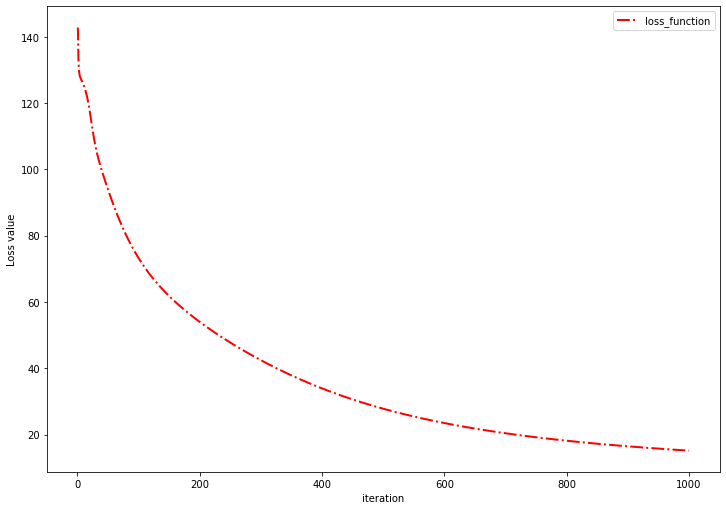

In [24]:
# Plot the loss value against the number of iterations.
fig = plt.figure(figsize=(10, 7))
plt.plot(list(range(1,max_iterations+1)), loss_list, '-.r', LineWidth=2,label='loss_function')
plt.legend()
plt.tight_layout()
plt.xlabel("iteration")
plt.ylabel('Loss value')
plt.show()

In [25]:
test_prediction, z1_p, h1_p = forward_propagation(test_X, w_h, b_h, w_o, b_o)

In [26]:
test_prediction

array([[2.65450581e-02, 8.74777952e-01, 9.86769895e-02],
       [9.46424715e-01, 5.15631121e-02, 2.01217334e-03],
       [3.30416523e-02, 9.25318875e-01, 4.16394724e-02],
       [2.30442158e-02, 8.18470400e-01, 1.58485384e-01],
       [9.69753338e-01, 2.89809489e-02, 1.26571356e-03],
       [3.48485131e-02, 9.20227391e-01, 4.49240962e-02],
       [9.10755794e-04, 6.09344160e-02, 9.38154828e-01],
       [1.24403453e-03, 7.90200644e-02, 9.19735901e-01],
       [9.68067297e-01, 3.06080028e-02, 1.32470062e-03],
       [5.02759331e-02, 9.26095508e-01, 2.36285593e-02],
       [5.65956627e-04, 4.00063420e-02, 9.59427701e-01],
       [6.50583163e-03, 3.33288267e-01, 6.60205901e-01],
       [9.69680269e-01, 2.90458311e-02, 1.27390041e-03],
       [6.48554773e-04, 4.48889333e-02, 9.54462512e-01],
       [9.64932314e-01, 3.36363500e-02, 1.43133582e-03],
       [2.82847277e-02, 9.00392570e-01, 7.13227023e-02],
       [1.10558304e-03, 7.18778974e-02, 9.27016520e-01],
       [1.15734183e-03, 7.41833

In [27]:
test_y

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [28]:
# Define a function to calculate the accuracy
def compute_acc(test_prediction, test_y):
    max_index_test = np.argmax(test_prediction, axis=1)
    actual_index_y = np.argmax(test_y, axis=1)
    t = 0
    for i in range(len(test_y)):
        if max_index_test[i] == actual_index_y[i]:
            t += 1
    return t/len(test_y)

In [29]:
accuracy = compute_acc(test_prediction, test_y)
print('Test Accuracy: {}%'.format(accuracy*100))

Test Accuracy: 100.0%


1. I have tried some learning rates like 0.1, 0.001. It found that the it cannot go to converage if there is a too large learning rate. Therefore, I chose lr = 0.001.
2. If you want to have a higher accuracy, the number of iteration must be larger enough. Under the same model, there is a better performance if it goes a larger iterations.